In [ ]:
# Домашнее задание №2 Павла Хоменко (базовая группа)

### Задача 1. Генератор. (15)

Напишите генератор, который принимает коллекцию с вложенными итерируемыми объектами, а возвращает каждый элемент последовательно.Если "распаковать" все получаемые значения в list, получится "сплющенный" список. Например:

[[1, 2, 3], [4, [5, 6, [7, 8]]]] -> [1, 2, 3, 4, 5, 6, 7, 8]

Еще пример:
[1, 2, 'abc', [2, 4], {'key' : 'value'}]

-> [1, 2, 'a', 'b', 'c', 2, 4, 'k', 'e', 'y']

(Итерация в словарях происходит по ключам)

*Подсказка.* Для проверки, что объект является итерируемым, можно использовать

<code>
from collections.abc import Iterable

...
</code>

<code>
if isinstance(x, Iterable):
</code>

Функция <code>isinstance(x, tp)</code> проверяет, относится ли <code>x</code>  к типу <code>tp</code>

In [ ]:
isinstance(2, int)

True

In [ ]:
from collections.abc import Iterable
print(isinstance(1, Iterable))
print(isinstance('abc', Iterable))

False
True


In [ ]:
# Решение

from collections.abc import Iterable

def coll_gen(coll):
  for elem in coll:
    if isinstance(elem, str): # нужно, чтобы не падать в бесконечную рекурсию если в строке 1 символ
      for ch in elem:
        yield ch
    elif isinstance(elem, Iterable):
      yield from coll_gen(elem)
    else:
      yield elem

gen = coll_gen([1, ['a', 'f', 'g'], 'cde', [8, 9, 15]])

for e in gen:
  print(e)

1
a
f
g
c
d
e
8
9
15


### Задача 2. itertools (15)

Модуль itertools представляет много инструментов для работы с итераторами.

Ознакомиться с ними можно здесь: https://docs.python.org/3/library/itertools.html

Вводится числа через пробел с одной строке. Затем вводится число n.

Напишите программу, которая находит все уникальные пары чисел из списка, где сумма каждой пары равна числу n. Можете использовать itertools.

Например, списка [1, 2, 3, 4, 5, 6] и n=7 программа должна вывести пары чисел, которые в сумме дают 7: [(1, 6), (2, 5), (3, 4)].

*Гарантируется, что числа в списке не повторяются.*

*Пары в кортежах должны быть в том же порядке, что в исходном списке.*

In [ ]:
nums = list(map(int, input().split()))
target = int(input())

from itertools import combinations
pairs = list(combinations(nums,2))
pairs_count = []

for pair in pairs:
    if (pair[0] + pair[1]) == target:
        pairs_count.append(pair)

print(pairs_count)

1 2 3 4 5 6
7
[(1, 6), (2, 5), (3, 4)]


### Задача 3. Numpy (22 балла)

**3.1 (Вспоминаем, что такое numpy)** (6 баллов)

$ 1.$ (2.5 б.)

Создайте с помощью np.random.randint numpy массив из 20-ти рандомных чисел.  (0.5 б.)
Посчитайте с помощью методов numpy и выведите на экран:

* среднее значение в массиве (0.5 б.)
* минимальное значение в массиве (0.5 б.)
* максимальное значение в массиве (0.5 б.)
* индекс минимального элемента в массиве (0.5 б.)


$ 2.$ (1.5 б.)Создайте два numpy массива: в первом должны быть четные числа от 2 до 14 включительно, а во втором — числа 7, 11, 17, 18, 23, 30, 45.

* Сложите массивы и возведите элементы получившегося массива в квадрат
* Выведите все элементы из первого массива, которые стоят на тех местах, где элементы второго массива больше 12 и дают остаток 3 при делении на 5.
* Для первого массива найдите остатки от деления на 2, а для второго — на 3.


$ 3.$ (2 б.)
1. Сгенерируйте рандомный массив b размера 3x1.
2. Сгенерируйте матрицу С размера 3x3.
3. Решите систему Cx = b с помощью numpy.linalg.solve
4. Подумайте/погуглите, в каком случае numpy.linalg.solve вернет ошибку LinAlgError. Воспроизведите этот случай.

In [4]:
import numpy as np
import time # понадобится для замера времени в следующих пунктах
from numpy import linalg

# Задание 1
a = np.random.randint(0, 10, size = 20)

print(np.mean(a))
print(np.min(a))
print(np.max(a))
print(np.argmin(a))

3.8
0
9
2


In [5]:
# Задание 2
a = np.arange(2, 15, 2)
b = np.array([7, 11, 17, 18, 23, 30, 45])
print((a + b) ** 2)
print(a[(b > 12) & (b % 5 == 3)])
print(a % 3)
print(b % 5)

[  81  225  529  676 1089 1764 3481]
[ 8 10]
[2 1 0 2 1 0 2]
[2 1 2 3 3 0 0]


In [6]:
# Задание 3
b = np.random.randint(1, 101, size=3)
C= np.random.randint(1, 101, size=(3,3))
x = linalg.solve(C, b)
print(x)

[-2.51437811  0.95406906  0.88290006]


In [8]:
# Задание 4
"""
Думаю, что linalg.solve выдаст ошибку в случае, если матрица C будет являться вырожденной
В этом случае невозможно будет найти обратную матрицу и вычислить x через нее
"""

D = np.array([[2, 4, 6],
             [1, 2, 3],
             [3, 6, 9]])
x = linalg.solve(D, b)

LinAlgError: Singular matrix

**3.2 (16 баллов)**

Сравните производительность операций умножения матриц с использованием библиотеки NumPy и стандартных списков Python для матриц размером от 2x2 до 100x100.

1. Сгенерируйте две матрицы A и B случайного размера от nxn, заполненные случайными целыми числами от 1 до 50. **(1 балл)**
2. Используя библиотеку NumPy, выполните умножение матриц A и B. Измерьте время выполнения операции. **(2 балла)**
3. Реализуйте функцию для умножения матриц с помощью стандартных списков Python. Измерьте время выполнения этой операции.  **(3 балла)**
4. Сделайте вышеперечисленные пункты для n=2,...100. **(4 балла)**
5. Для какого-нибудь n проверьте, что результаты совпадают. **(1 балл)**


6. **(5 баллов)**

(Вариант 1) Для каждого n выведите на экран размеры матриц и время выполнения умножения для обеих реализаций.

(Вариант 2, с визуализацией) Постройте график, где по оси X будет размер матрицы, по оси Y - время выполнения операции. Постройте два графика (для numpy и для стандартных списков)



Для n = 2 время для numpy:  0.0000 время для списков:  0.0000
Для n = 3 время для numpy:  0.0000 время для списков:  0.0000
Для n = 4 время для numpy:  0.0000 время для списков:  0.0000
Для n = 5 время для numpy:  0.0000 время для списков:  0.0001
Для n = 6 время для numpy:  0.0000 время для списков:  0.0001
Для n = 7 время для numpy:  0.0000 время для списков:  0.0001
Для n = 8 время для numpy:  0.0000 время для списков:  0.0001
Для n = 9 время для numpy:  0.0000 время для списков:  0.0002
Для n = 10 время для numpy:  0.0000 время для списков:  0.0002
Для n = 11 время для numpy:  0.0000 время для списков:  0.0003
Для n = 12 время для numpy:  0.0000 время для списков:  0.0004
Для n = 13 время для numpy:  0.0000 время для списков:  0.0005
Для n = 14 время для numpy:  0.0000 время для списков:  0.0005
Для n = 15 время для numpy:  0.0000 время для списков:  0.0006
Для n = 16 время для numpy:  0.0000 время для списков:  0.0008
Для n = 17 время для numpy:  0.0000 время для списков:  0.0009


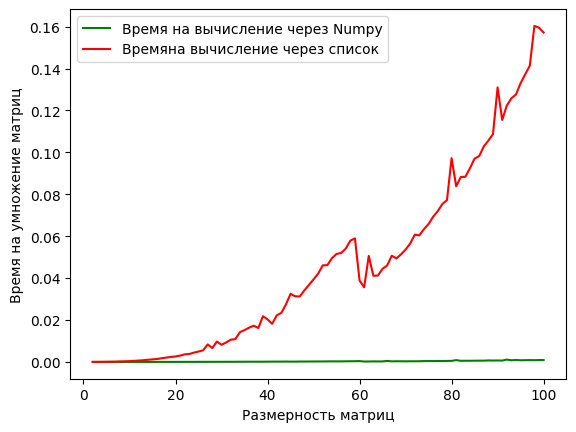

In [ ]:
import random
import time
import numpy as np

n = random.randint(2, 100)

def generate_matrix(n):
    a_numpy = np.random.randint(1, 51, size=(n, n))
    b_numpy = np.random.randint(1, 51, size = (n, n))
    a_list =  a_numpy.tolist()
    b_list =  b_numpy.tolist()
    return a_numpy, b_numpy, a_list, b_list

def exec_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        return result, execution_time
    return wrapper

@exec_time
def matrix_mult_numpy(A, B):
    return A @ B

@exec_time
def matrix_mult_list(A, B):
    C = []
    for i in range(len(A)):
        st_arr = []
        for j in range(len(B[0])):
            sum_product = sum(A[i][k] * B[k][j] for k in range(len(B)))
            st_arr.append(sum_product)
        C.append(st_arr)
    return C

# Задача 3.2.1
A_numpy, B_numpy, A_list, B_list = generate_matrix(n)

# Задача 3.2.2
C_numpy = matrix_mult_numpy(A_numpy, B_numpy)

# Задача 3.2.3
C_list = matrix_mult_list(A_list, B_list)

# Задача 3.2.4
for n in range(2, 101):
    A_numpy, B_numpy, A_list, B_list = generate_matrix(n)
    C_numpy, exec_time_numpy = matrix_mult_numpy(A_numpy, B_numpy)
    C_list, exec_time_list = matrix_mult_list(A_list, B_list)
    print(f'Для n = {n} время для numpy: {exec_time_numpy: .4f} время для списков: {exec_time_list: .4f}')


# Задача 3.2.5
A_numpy, B_numpy, A_list, B_list = generate_matrix(3)
C_numpy = matrix_mult_numpy(A_numpy, B_numpy)[0]
C_list = matrix_mult_list(A_list, B_list)[0]
print(f"Массивы равны? {np.array_equal(C_numpy, np.array(C_list))}")

# Задача 3.2.6
import matplotlib.pyplot as plt

X = []
Y_numpy = []
Y_list = []
for n in range(2, 101):
    A_numpy, B_numpy, A_list, B_list = generate_matrix(n)
    C_numpy, exec_time_numpy = matrix_mult_numpy(A_numpy, B_numpy)
    C_list, exec_time_list = matrix_mult_list(A_list, B_list)
    X.append(n)
    Y_numpy.append(exec_time_numpy)
    Y_list.append(exec_time_list)
plt.plot(X, Y_numpy, label = "Время на вычисление через Numpy", color = "g")
plt.plot(X, Y_list, label = "Времяна вычисление через список", color = "r")
plt.xlabel("Размерность матриц")
plt.ylabel("Время на умножение матриц")
plt.legend()
plt.show()

### Задача 4. Введение в pandas (8 баллов)

Работаем с датасетом по кредитному скорингу loan_data.csv. Скачайте его здесь https://disk.yandex.ru/d/xkujsz3HFJ8taw и считайте с помощью pd.read_csv.

Используемые столбцы:

- credit.policy - 1, если клиент соответствует критериям выдачи кредита, 0 в противном случае.
- purpose - цель кредита (принимает значения "credit_card", "debt_consolidation", "educational", "home_improvement", "major_purchase", "small_business"  и "all_other").
- int.rate - процентная ставка по кредиту.
- installment - ежемесячный платеж, причитающийся заемщику в случае финансирования кредита.
- log.annual.inc - натуральный логарифм годового дохода заемщика, представленного им самим.
- dti - отношение долга к доходу заемщика (сумма долга, деленная на годовой доход).
- fico - кредитный рейтинг FICO заемщика.
- days.with.cr.line - количество дней, в течение которых у заемщика была открыта кредитная линия.
- revol.bal - возобновляемый баланс заемщика (сумма, не выплаченная в конце платежного цикла по кредитной карте).
- revol.util - коэффициент использования возобновляемой кредитной линии заемщиком (сумма использованной кредитной линии по отношению к общему объему доступных кредитов).
- inq.last.6mths - количество запросов заемщика от кредиторов за последние 6 месяцев.
- delinq.2yrs - количество раз, когда заемщик просрочивал платеж более чем на 30 дней за последние 2 года.
- pub.rec - количество негативных публичных записей о заемщике (заявления о банкротстве, налоговые залоги или судебные решения).
- not.fully.paid - неполностью выплаченный кредит ранее.

In [ ]:
import pandas as pd
data = pd.read_csv('loan_data.csv')

Каждый пункт весит 0.6 балла, максимальный балл за задание - 8.

1. Выведите первые 5 строк датасета.
2. Сколько в датасете строк и столбцов?
3. Есть ли в датасете пропуски?
4. Выведите все описательные статистики по переменным
5. Какая средняя процентная ставка по кредиту?
6. Сколько клиентов соответствует условиям выдачи кредита?
7. Как отличается средний логарифм годового дохода заемщиков, которые соответствует условиям выдача кредита и тех, кто не соответствует?
8. Какой медианный ежемесячный платеж?
9. Сколько уникальных значений у переменной not.fully.paid?
10. Сделайте столбец annual.inc для подсчета годового дохода (выполните обратное преобразование столбца log.annual.inc)
11. Сделайте группировку по двум переменным: 	credit.policy	 и not.fully.paid. Посчитайте для каждой группы количество клиентов, средний ежемесячный платеж, медианный ежемесячный платеж, средний годовой доход.
12. Выведите топ-10 клиентов по уровню дохода среди тех, кто не удовлетворяет критериям выдачи кредита.
13. Есть ли выбросы у переменной  annual.inc? Выбросами считайте наблюдения, которые не лежает в границах $[Q1-1.5IQR, Q3+1.5IQR]$, где $IQR$ - межквартильный размах,  $Q1$ - 25 перцентиль, $Q3$ - 75 перцентиль.
14. Постройте распределения переменных annual.inc и log.annual.inc

In [ ]:
# 1
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
# 2
print(f"Ответ: {data.shape[0]} строк и {data.shape[1]} столбцов")

Ответ: 9578 строк и 14 столбцов


In [ ]:
# 3
print(f"В датасете {data.isna().sum().sum()} пропусков")

В датасете 0 пропусков


In [ ]:
# 4
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
# 5
print(f"Средняя ставка по кредиту: {data['int.rate'].mean() * 100: .2f}%")

Средняя ставка по кредиту:  12.26%


In [ ]:
# 6
print(f"Условиям выдачи кредита соответствуют {data[data['credit.policy'] == 1]['credit.policy'].count()} заемщиков")

Условиям выдачи кредита соответствуют 7710 заемщиков


In [ ]:
# 7
mean_incp = data[data['credit.policy'] == 1]['log.annual.inc'].mean()
mean_notincp = data[data['credit.policy'] == 0]['log.annual.inc'].mean()
print(f"Средний логарифм годового дохода заемщиков, которые соответствует условиям выдачи кредита в  и тех, кто не соответствует?")

Средний логарифм годового дохода заемщиков, которые соответствует условиям выдачи кредита в  и тех, кто не соответствует?


In [ ]:
# 8
print(f"Медианный среднемесячный платеж {data['installment'].median()} USD")

Медианный среднемесячный платеж 268.95 USD


In [ ]:
# 9
print(f"В столбце not.fully.paid {len(data['not.fully.paid'].unique())} уникальных значениz")

В столбце not.fully.paid 2 уникальных значениz


In [ ]:
# 10
data['annual.inc'] = np.exp(data['log.annual.inc'])

In [ ]:
# 11
pd.options.display.float_format = '{:,.2f}'.format

data.groupby(['credit.policy', 'not.fully.paid']).agg({
    'not.fully.paid':'count',
    'installment':('mean', 'median'),
    'annual.inc':'mean'
})

not.fully.paid installment        annual.inc
                                      count        mean median       mean
credit.policy not.fully.paid                                             
0             0                        1349      283.94 228.69  68,207.31
              1                         519      321.46 258.16  72,874.81
1             0                        6696      320.75 273.84  68,679.67
              1                        1014      353.70 301.83  64,538.35

In [ ]:
# 12
data[data['credit.policy'] == 0].sort_values(by = "annual.inc", ascending = False).head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual.inc
8363,0,all_other,0.10,811.27,13.46,0.81,737,"3,630.00",200583,23.10,1,0,0,1,"700,000.00"
7907,0,small_business,0.12,659.91,13.33,2.33,692,"4,005.96",0,0.00,5,0,0,1,"616,000.00"
9042,0,small_business,0.20,735.06,13.30,14.39,672,"7,620.00",952013,99.00,6,0,0,0,"600,000.00"
7799,0,credit_card,0.17,489.61,13.12,7.47,667,"3,600.00",168496,46.10,2,1,0,1,"500,000.00"
9248,0,home_improvement,0.21,681.19,13.02,14.10,697,"3,539.96",27286,56.50,10,1,0,0,"450,000.00"
8975,0,home_improvement,0.10,513.51,13.02,9.66,777,"6,780.04",255805,20.50,2,0,0,0,"450,000.00"
8886,0,small_business,0.11,392.57,13.02,8.49,737,"5,130.00",224090,40.10,3,0,0,0,"450,000.00"
9180,0,small_business,0.20,555.86,12.95,8.76,682,"5,009.96",374487,89.60,1,0,0,0,"420,000.00"
9299,0,all_other,0.17,713.49,12.86,6.18,667,"7,650.00",162716,73.70,1,0,0,0,"385,000.00"
8235,0,small_business,0.18,755.91,12.83,8.52,652,"5,039.04",165108,92.30,4,0,0,1,"374,000.00"


In [ ]:
# 13
q1 = data['annual.inc'].quantile(0.25)
q3 = data['annual.inc'].quantile(0.75)
iqr = q3 - q1
left_bound = q1 - 1.5 * iqr
right_bound = q3 + 1.5 * iqr
outliers = data[(data['annual.inc'] < left_bound) | (data['annual.inc'] > right_bound)]
print(f"Количество выбросов в выборке: {outliers.shape[0]}")

Количество выбросов в выборке: 553


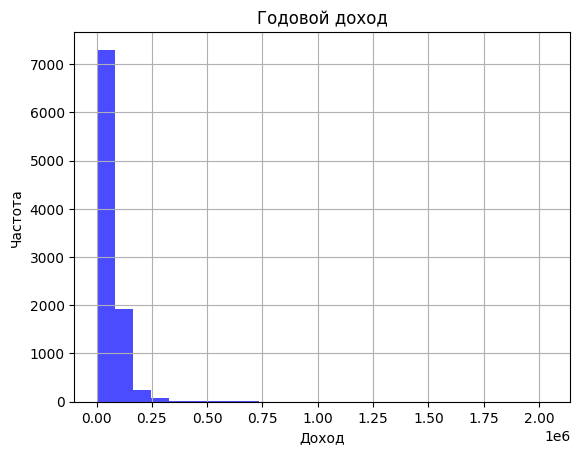

In [ ]:
# 14
data['annual.inc'].hist(bins=25, color='blue', alpha=0.7)
plt.title('Годовой доход')
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.show()

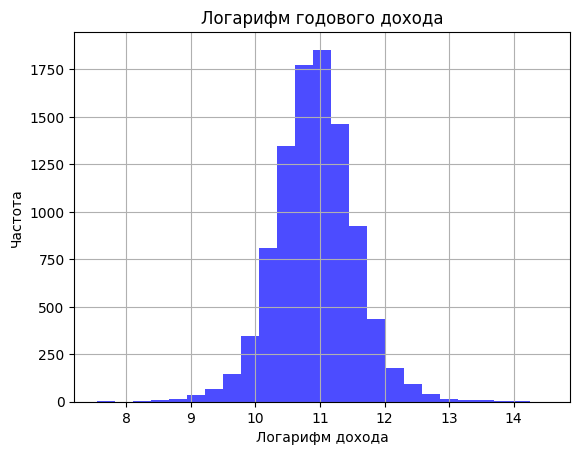

In [ ]:
data['log.annual.inc'].hist(bins=25, color='blue', alpha=0.7)
plt.title('Логарифм годового дохода')
plt.xlabel('Логарифм дохода')
plt.ylabel('Частота')
plt.show()